#Trabalho Final - ICD



Nome e Matrícula dos integrantes

-Caio Teles Cunha 2020006434

-Gabriel Caian Guimaraes Cabral 2020006515

-Ivan Vilaça de Assis 2021421931

-Eduardo Assis Tomich 2020006485



### **Introdução**

Nesse trabalho vamos analisar as características de pacientes que tiveram (ou não) um derrame.

### **Motivação**

A principal ideia surgiu ao tentar entender as características principais que possam aumentar a chance de um indivíduo ter um derrame ou alguma outra complicação de saúde, tentando analisar se questões como sexo, idade e indice de massa corporal possam ser fatores utilizados para avaliar a pré-disposição do paciente a ter estas complicações.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from scipy import stats as ss

In [ ]:
plt.style.use('seaborn-colorblind')

plt.rcParams['figure.figsize']  = (12, 7)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [ ]:
# Importando o arquivo .csv do dataset
url = 'https://raw.githubusercontent.com/IvanAssis07/TP_ICD/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

# Removendo a coluna "id" presente originalmente, pois ela não nos será útil.
df = df.drop('id', axis=1)

**Descrição do dataset**

De acordo com OMS, derrame é a segunda maior causa de mortes no mundo. O derrame corresponde a danos ao cérebro devido à interrupção do fornecimento de sangue o que pode levar a danos permanetes ou a morte. No Brasil, 

Levando em conta a gravidade desta doença, usaremos esse dataset para ver quais grupos estão mais suscetíveis a ter um derrame, também tentando apontar fatores que influenciam essa doença. Além do derrame tentaremos fazer afirmações sobre as outras condições de saúde presentes neste conjunto de dados, pressão alta e doença no coração.

Nessa base de dados, cada linha representa um paciente e as colunas diversos fatores sobre estes.

**Indíce das colunas:**

- gender: "Male","Female" ou "Other";
- age: idade do paciente;
- hypertension: 0 se o paciente não tem pressão alta, 1 se o paciente tem pressão alta;
- heart_disease: 0 se o paciente não tem nenhuma doença do coração, 1 se o paciente tem uma doença do coração;
- ever_married: "Yes" ou "No";
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed";
- Residence_type: "Rural" ou "Urban";
- avg_glucose_level: nível médio de glicose no sangue;
- bmi: índice de massa corporal;
- smoking_status: "formerly smoked", "never smoked", "smokes" ou "Unknown"*
- stroke: 1 se o paciente já teve um derrame ou 0 se não.

**Observação:** "Unknown"* em smoking_status significa que não temos a informação se esse paciente fuam ou não.


Primeiras visualizações do banco do nosso banco de dados:

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Tratamento de dados**


Antes de começar precisamos checar se existem dados faltantes e tratar esses dados se eles existirem.



In [ ]:
# olharemos para cada uma das colunas
print("dados faltantes em idade:")
print(df['age'].isnull().sum())

print("dados faltantes em hipertensão:")
print(df['hypertension'].isnull().sum())

print("dados faltantes em doença de coração:")
print(df['heart_disease'].isnull().sum())

print("dados faltantes em nivel de glicose médio:")
print(df['avg_glucose_level'].isnull().sum())

print("dados faltantes em status de fumante:")
print(df['smoking_status'].isnull().sum())

print("dados faltantes em derrame:")
print(df['stroke'].isnull().sum())

print("dados faltantes em bmi:")
print(df['bmi'].isnull().sum())

dados faltantes em idade:
0
dados faltantes em hipertensão:
0
dados faltantes em doença de coração:
0
dados faltantes em nivel de glicose médio:
0
dados faltantes em status de fumante:
0
dados faltantes em derrame:
0
dados faltantes em bmi:
201


Percebemos que existem dados faltantes apenas na coluna bmi. Como estamos usando um dataset pequeno, vamos optar por completar esses dados com a média dos dados naquela coluna. Assim podemos ainda utilizar essas linhas que possuem dados faltantes.

In [ ]:
media_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(media_bmi)

Tendo tratado os dados podemos agora passar para a visualização destes

**Visualização dos nossos Dados**

Primeiro vamos usar os gráficos para checarmos alguns detalhes do dataset. A análise inicial é sobre a faixa etária dos pacientes utilizadas na amostra.

Como podemos confirmar abaixo, o estudo se concentrou em pessoas com uma idade maior do que 30 anos. Isso é importante, visto que algumas doenças analisadas além do derrame, como pressão alta e doença no coração, são mais recorrentes em pessoas mais velhas.

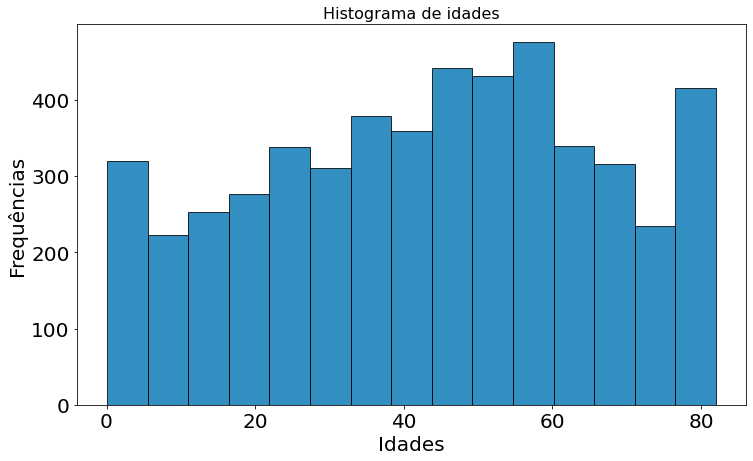

In [ ]:
df_age = df.groupby('age')

plt.xlabel('Idades')
plt.ylabel('Frequências')
plt.title('Histograma de idades', fontsize=16)

plt.hist(df['age'], edgecolor='k', alpha=0.8, bins=15)
plt.show()

Posteriormente, é interessante analisar a quantidade de homens e mulheres no banco de dados para saber se a pesquisa foi equilibrada. Claramente podemos ver que o banco de dados possui mais mulheres que homens.

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

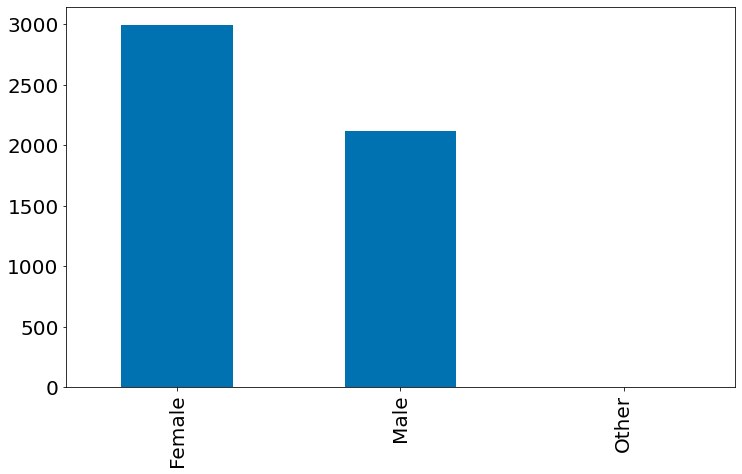

In [ ]:
df['gender'].value_counts().plot(kind='bar')

A seguir, plotamos um gráfico de dispersão para visualizar uma possível relação entre pressão alta, idade das pessoas (considerando apenas as pessoas acima de 50 anos) e IMC.

Foi adicionada uma linha que representa o IMC o limite do valor do IMC para apontar pessoas acima do peso, este limite é 25.0 de acordo com a [OMS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/).

Analisando o gráfico é vemos uma possível relação entre ser acima do peso e ter pressão alta. Visto que a maioria das pessoas com esta doença estão acima da linha que representa o limite do IMC.


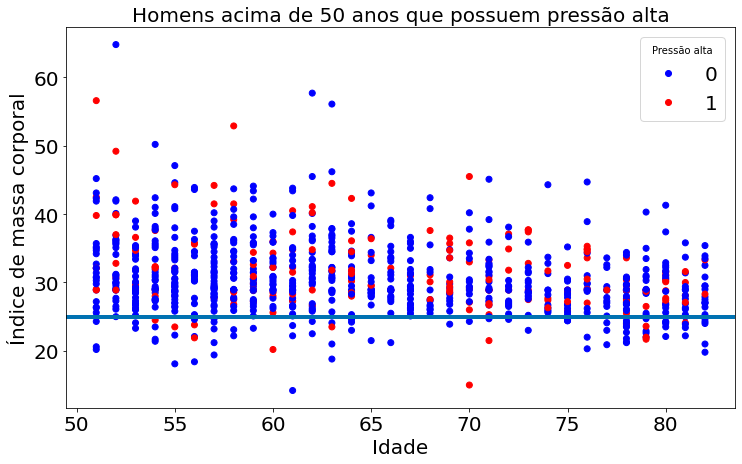

In [ ]:
df_age_bigger_50 = df.query('gender == "Male" and age > 50')
df_age_bigger_50

fig,ax = plt.subplots(figsize=(12, 7))
# Plotando os dados
scatter = ax.scatter(df_age_bigger_50["age"], 
                     df_age_bigger_50["bmi"],
                     c=df_age_bigger_50["hypertension"],
                     cmap='bwr')

# Realizando a customizqaçao dos títulos
ax.set(title="Homens acima de 50 anos que possuem pressão alta",
       xlabel="Idade",
       ylabel="Índice de massa corporal");
ax.legend(*scatter.legend_elements(), title="Pressão alta");

# Add a meanline
ax.axhline(25);

plt.show()

**Perguntas**

_Levando em consideração as pessoas entre 60 a 80 anos, há uma influência de morar no meio urbano ou no meio rural para a chance de ter hipertensão?_

_Há uma influência do sexo biológico na chance de ter um derrame?_

_Como prever a chance de hipertensão através dos dados?_

_Qual a correlação entre a idade e o indice de massa corporal?_ 



## Pergunta 1
### Levando em consideração as pessoas entre 60 a 80 anos, há uma influência de morar no meio urbano ou no meio rural para a chance de ter hipertensão?

In [ ]:
# Para a primeira questão

# Vamos pegar a faixa etária de 60 a 80 anos
data = df.query('age > 60 and age < 80')

# Primeiramente calculamos a estatística de teste
filtro = data['Residence_type'] == "Rural"
t_obs = data[~filtro]["hypertension"].mean() - data[filtro]["hypertension"].mean()

# Depois fazemos o bootstrap e construimos o intervalo de confiança com 5% de significância
size = len(data)
diffs = np.zeros(1000)

for i in range(1000):
    np.random.shuffle(filtro.values)
    diffs[i] = data[~filtro]["hypertension"].mean() - data[filtro]["hypertension"].mean()

alpha = 0.05
count_inf = np.percentile(diffs, (alpha/2)*100).round(2)
count_sup = np.percentile(diffs, (1-alpha/2)*100).round(2)

if( t_obs > count_inf or t_obs < count_sup ):
  resp = '''
Como a estatística aparece nos 95% mais prováveis, ela pode ser explicada pela aleatoriedade,
então não podemos dizer que existem evidências de uma relação entre morar no campo ou na cidade para a hipertensão.
'''
  print(resp)
else:
  resp = '''
Como a estatística aparece nos 5% menos provavéis, podemos afirmar que existem evidências de uma relação entre
onde a pessoa mora e ter ou não hipertensão.
'''
  print(resp)
  



Como a estatística aparece nos 95% mais prováveis, ela é explicada pela aleatoriedade,
então não podemos dizer que existem evidências de uma relação entre morar no campo ou na cidade para a hipertensão.



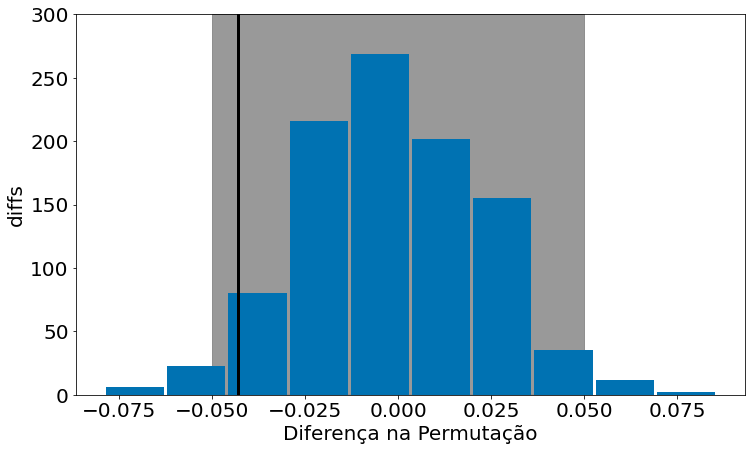

In [ ]:
plt.hist(diffs, bins=10, rwidth=0.95)
plt.fill_between([count_inf, count_sup], 1, 300, color='grey', alpha=0.8)
plt.ylim(top=300)
plt.axvline(t_obs, color='k', linewidth=3)
plt.xlabel('Diferença na Permutação')
plt.ylabel('diffs')
plt.show()

## Pergunta 2
### Há uma influência do sexo biológico na chance de ter um derrame?

In [ ]:
#Para a segunda pergunta
#Qual a influência do sexo biológico na chance de ter um derrame?

n = 1000

df1 = df[df['gender']=='Male']
df2 = df[df['gender']=='Female']

size1 = len(df1)
size2 = len(df2)
men_values = np.zeros(n)
women_values = np.zeros(n)

for i in range(n):
    sample1 = df1['stroke'].sample(size1, replace=True)
    sample2 = df2['stroke'].sample(size2, replace=True)
    men_values[i] = sample1.mean()
    women_values[i] = sample2.mean()

Agora plotamos os boxplots de cada grupo e avaliamos se há intersecção da amplitude dos valores para os 2 sexos

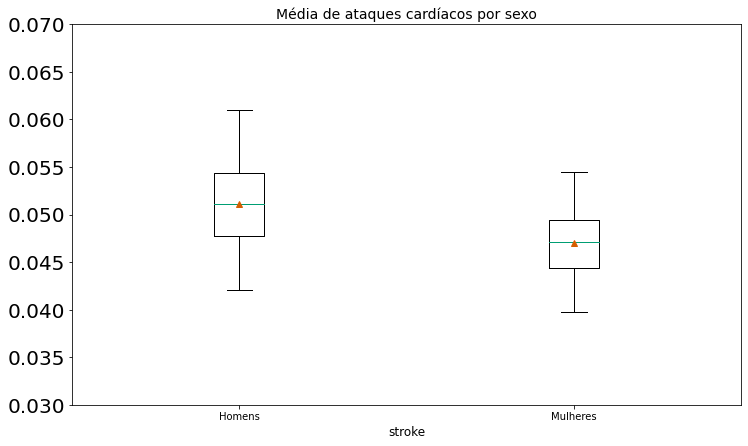

In [ ]:
bp_data = [men_values, women_values]
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Homens', 'Mulheres'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('stroke', fontsize=12)
plt.title('Média de ataques cardíacos por sexo', fontsize=14)
plt.ylim(top=0.07,bottom = 0.030)
plt.show()

Podemos observar que existe intersecção entre os boxplots. Então não existe evidência nesse banco de dados de uma maior chance de derrame em um sexo.


## Pergunta 3
### Qual a chance de ter hipertensão a partir dos atributos numéricos? (Predição)
### Classificar hipertensão a partir dos atributos numéricos

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Podemos observar a distribuição de hipertensão por cada valor numérico presente na tabela.

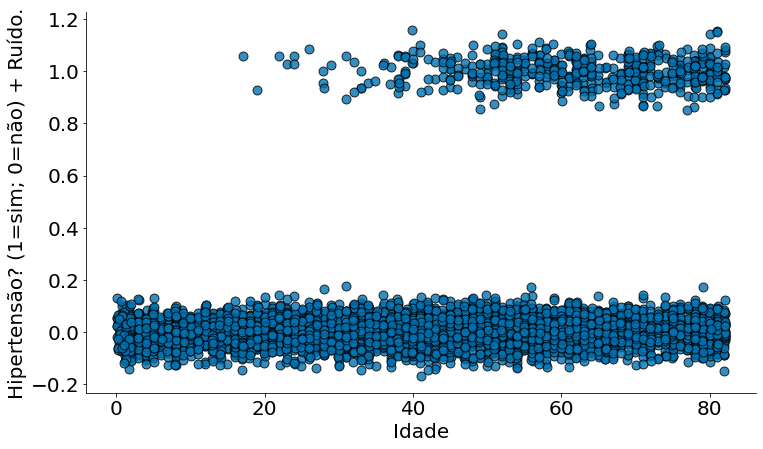

In [ ]:
n = df.shape[0]
plt.scatter(df['age'] + np.random.normal(0, 0.05, size=n),
            df['hypertension'] + np.random.normal(0, 0.05, size=n),
            s=80, alpha=0.8, edgecolors='k')
plt.xlabel('Idade')
plt.ylabel('Hipertensão? (1=sim; 0=não) + Ruído.')
despine()

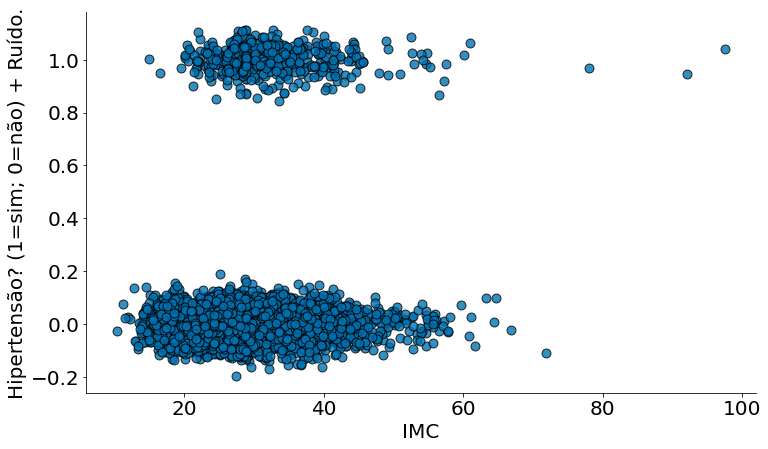

In [ ]:
n = df.shape[0]
plt.scatter(df['bmi'] + np.random.normal(0, 0.05, size=n),
            df['hypertension'] + np.random.normal(0, 0.05, size=n),
            s=80, alpha=0.8, edgecolors='k')
plt.xlabel('IMC')
plt.ylabel('Hipertensão? (1=sim; 0=não) + Ruído.')
despine()

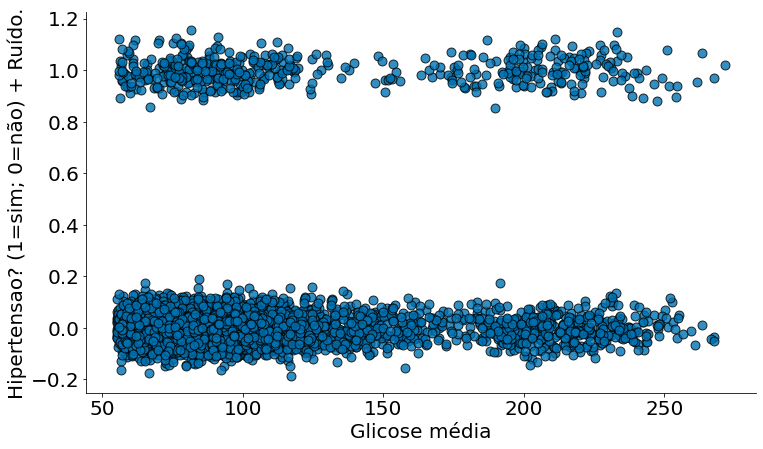

In [ ]:
n = df.shape[0]
plt.scatter(df['avg_glucose_level'] + np.random.normal(0, 0.05, size=n),
            df['hypertension'] + np.random.normal(0, 0.05, size=n),
            s=80, alpha=0.8, edgecolors='k')
plt.xlabel('Glicose média')
plt.ylabel('Hipertensao? (1=sim; 0=não) + Ruído.')
despine()

Retiramos os valores categoricos, uma vez que não são interessantes na nossa analise

In [ ]:
data = df.drop(['gender','heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 'columns')
data

,age,hypertension,avg_glucose_level,bmi
0,67.0,0,228.69,36.600000
1,61.0,0,202.21,28.893237
2,80.0,0,105.92,32.500000
3,49.0,0,171.23,34.400000
4,79.0,1,174.12,24.000000
...,...,...,...,...
5105,80.0,1,83.75,28.893237
5106,81.0,0,125.20,40.000000
5107,35.0,0,82.99,30.600000
5108,51.0,0,166.29,25.600000


Dividimos os valores em casos de teste e treino, alem de z-normalizar os dados numericos da tabela.

In [ ]:
y = data['hypertension']
X = data.copy()
X = X.drop('hypertension', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

# Z-normalizando os dados
Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train / std_train

Z_test = X_test.copy()
Z_test = X_test - mean_train
Z_test = Z_test / std_train

Usando a biblioteca sklearn.linear_model, realizamos a Regressão Logistica dos valores normalizados (Kfold = 5).

In [ ]:
model = LogisticRegressionCV(Cs=100,
                             penalty='l2',   #ridge
                             cv=5,           #5 folds internos
                             fit_intercept=False,
                             solver='liblinear',
                             multi_class='ovr')
model.fit(Z_train, y_train)

LogisticRegressionCV(Cs=100, cv=5, fit_intercept=False, multi_class='ovr',
                     solver='liblinear')

Podemos, por fim, visualizar a classificação dos dados.

In [ ]:
print(classification_report(y_test, model.predict(Z_test)))

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       935
           1       0.16      0.93      0.27        87

    accuracy                           0.56      1022
   macro avg       0.57      0.73      0.48      1022
weighted avg       0.92      0.56      0.65      1022



Analisando a acurácia do classificador (predições corretas/data points totais), temos uma acurácia de 56%. Portanto, usando o modelo escolhido, temos 56% de predições corretas acerca de casos de hipertensão.

## Pergunta 4
### Qual a correlação entre a idade e o IMC?

Primeiro vamos fazer um gráfico de dispersão para idade e IMC.
A seguir plotaremos um gráfico de dispersão de IMC x Idade, buscando visualizar alguma possível relação entre esses 2 atributos.

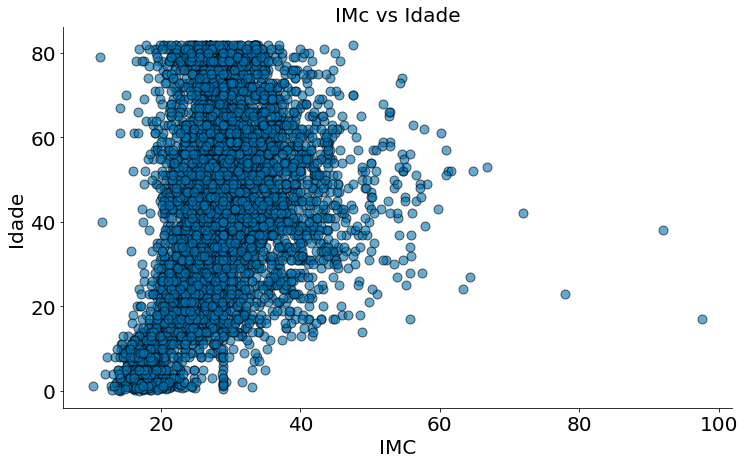

In [ ]:
plt.scatter(df['bmi'], df['age'], edgecolor='k', alpha=0.6, s=80)
plt.ylabel('Idade')
plt.xlabel('IMC')
plt.title('IMc vs Idade')
despine()

Como não sabemos se a correlação é linear, usaremos a correlação de Pearson para tentar verificar alguma possível relação.

In [ ]:
def corr(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)

corr(df['age'],df['bmi'])

0.3259424731736092

Como a correlação de Pearson deu um valor de 0.325, o qual é próximo de 0. Logo, não podemos afirmar que esse dados têm uma relação muito forte.


A seguir usaremos a correlação de Spearman, pensando que talvez nossos 2 atributos tenham uma relação não linear, a qual é melhor capturada por essa medida.

In [ ]:
corr, pvalue = ss.spearmanr(df['age'], df['bmi'])
corr

0.363661456705788

A seguir, utilizaremos a biblioteca seaborn que permite observar todas as correlações em um único plot.

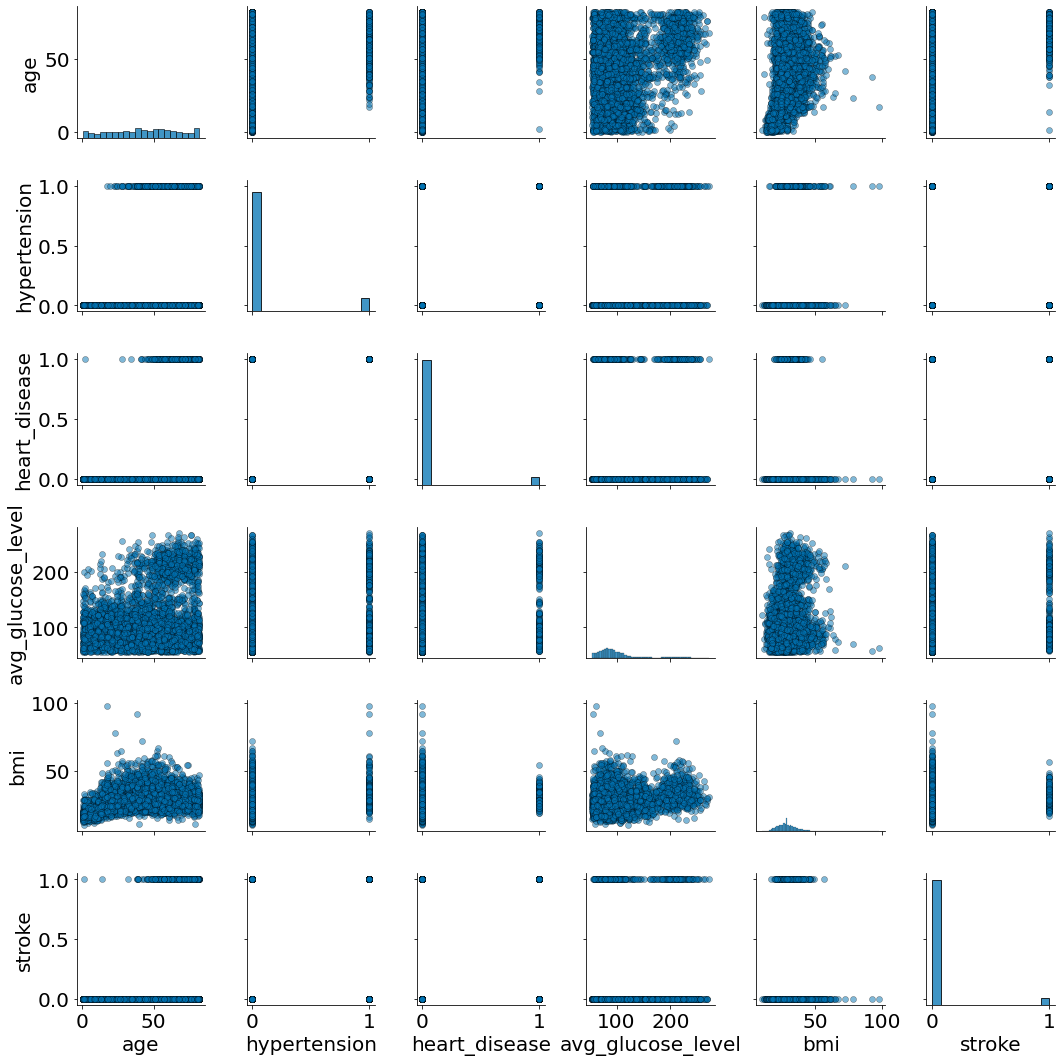

In [ ]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'}, height=2.5)